# Machine learning Assignment-1

# Problem Statement
The Market historical dataset of real estate valuation are collected From sindian Dist.New Taipei city,Taiwan.
The real estate valuation is a regression problem.The dataset was randomly split into training data set(2/3samples) and the 
testing data set(1/3 samples).

we have to predict the house price of unit area using some given information house age,transaction date,distance to the nearest MRT station,number of convenience stores,the geographic coordinate latitude and longitude.

we have given a csv file containing historical data of houses                                                                      
Dataset source : http://archive.ics.uci.edu/ml/machine-learning-databases/00477/

# Importing the Dataset

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [103]:
house_df= pd.read_csv('real estate dataset.csv')

In [104]:
house_df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


The dataset contains 414 rows and 8 columns.Each row of the dataset contains information about one customer
Our objective is to find a way to estimate the value in the "house price" per unit area using the values in the other column.
If we can do so for the historical data,then we should able to estimate the house prices for new houses too.

Let's check the datatype for each column.

In [105]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


looks like that all the columns in the dataset are numbers.
None of the columns contain any Null values.

Here are some statistics for the numerical columns.

In [106]:
house_df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


The house prices columns seems to be significantly skewed, However the median is much lower than the maximum value

In [107]:
cols_to_use = ['X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores','Y house price of unit area']

Now , we define the columns which are important for our Target variable

In [108]:
dataset = house_df[cols_to_use]
dataset.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,32.0,84.87882,10,37.9
1,19.5,306.59470,9,42.2
2,13.3,561.98450,5,47.3
3,13.3,561.98450,5,54.8
4,5.0,390.56840,5,43.1


In [109]:
a = np.log10(dataset['X3 distance to the nearest MRT station'])

In [110]:
dataset['distance to the nearest MRT station'] = a

C:\Users\bhave\AppData\Local\Temp/ipykernel_8348/2387180279.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['distance to the nearest MRT station'] = a


In [111]:
dataset.drop(['X3 distance to the nearest MRT station'],axis=1)

,X2 house age,X4 number of convenience stores,Y house price of unit area,distance to the nearest MRT station
0,32.0,10,37.9,1.928799
1,19.5,9,42.2,2.486565
2,13.3,5,47.3,2.749724
3,13.3,5,54.8,2.749724
4,5.0,5,43.1,2.591697
...,...,...,...,...
409,13.7,0,15.4,3.610875
410,5.6,9,50.0,1.956438
411,18.8,7,40.6,2.592143
412,8.1,5,52.5,2.020403


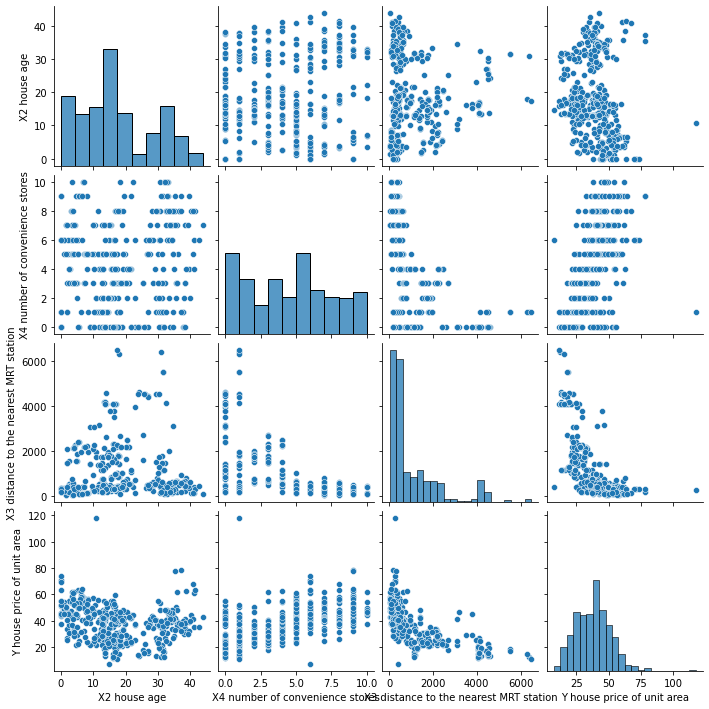

In [112]:
sns.pairplot(dataset[['X2 house age','X4 number of convenience stores','X3 distance to the nearest MRT station','Y house price of unit area']])

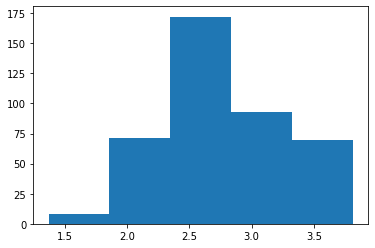

In [113]:
plt.hist(a,bins=5)
plt.show()

In [114]:
dataset.shape

(414, 5)

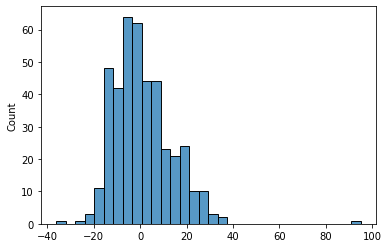

In [115]:
import seaborn as sns
sns.histplot(model_result.resid);

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


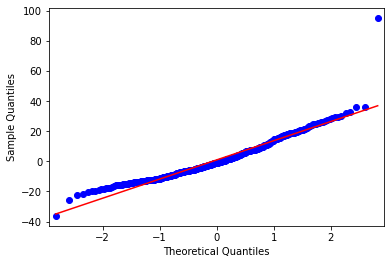

In [116]:
sm.qqplot(model_result.resid, line='s');

<AxesSubplot:>

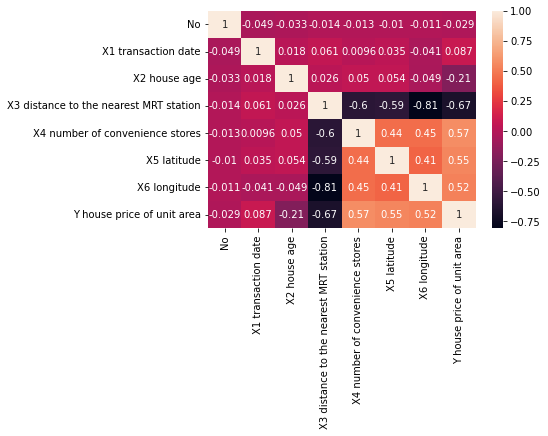

In [117]:
sns.heatmap(house_df.corr(),annot=True)

In [118]:
data = dataset.drop('X3 distance to the nearest MRT station',axis=1)

In [119]:
x = data.drop('Y house price of unit area',axis=1)

In [120]:
x

,X2 house age,X4 number of convenience stores,distance to the nearest MRT station
0,32.0,10,1.928799
1,19.5,9,2.486565
2,13.3,5,2.749724
3,13.3,5,2.749724
4,5.0,5,2.591697
...,...,...,...
409,13.7,0,3.610875
410,5.6,9,1.956438
411,18.8,7,2.592143
412,8.1,5,2.020403


In [121]:
y = dataset['Y house price of unit area']

In [122]:
import statsmodels.api as sm

In [123]:
model = sm.OLS(y, x)
model_result = model.fit()
model_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                    
===============================================================================================
Dep. Variable:     Y house price of unit area   R-squared (uncentered):                   0.899
Model:                                    OLS   Adj. R-squared (uncentered):              0.899
Method:                         Least Squares   F-statistic:                              1226.
Date:                        Sun, 09 Oct 2022   Prob (F-statistic):                   1.46e-204
Time:                                00:19:17   Log-Likelihood:                         -1642.6
No. Observations:                         414   AIC:                                      3291.
Df Residuals:                             411   BIC:                                      3303.
Df Model:                                   3                                                  
Covariance Type:                    nonrobust                                                  
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
X2 house age                           -0.1926      0.056     -3.437      0.001      -0.303      -0.082
X4 number of convenience stores         4.1062      0.189     21.761      0.000       3.735       4.477
distance to the nearest MRT station     8.4973      0.439     19.363      0.000       7.635       9.360
==============================================================================
Omnibus:                      140.379   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              817.802
Skew:                           1.322   Prob(JB):                    2.61e-178
Kurtosis:                       9.357   Cond. No.                         15.2
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Splitting the Dataset into Training set and Test set

In [124]:
from sklearn.model_selection import train_test_split
train_x,test_x, train_y, test_y = train_test_split(x,y,test_size=0.33,random_state=1)

# Training the Simple Linear Regression Model on Training set

In [125]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(train_x,train_y)

LinearRegression()

# Predicting the Test results

In [126]:
y_pred = regressor.predict(test_x)

In [127]:
y_pred

array([29.85102291, 50.45167354, 24.20569655, 21.07506934, 43.56946071,
       29.18722344, 27.86018356, 34.02542937, 38.89947571, 18.9018533 ,
       19.58617882, 40.83541845, 29.58994723, 49.87070841, 57.76732877,
       29.28435638, 43.56946071, 39.7169636 , 28.03805637, 44.25276083,
       57.24840875, 27.51157372, 39.9178378 , 47.8118029 , 42.59628991,
       29.07210282, 29.7165526 , 52.60054699, 43.95728394, 20.93237498,
       30.88479444, 32.81538547, 36.55040638, 52.66691396, 49.78057758,
       21.25134754, 38.88753332, 38.21024408, 29.68694293, 21.02529411,
       37.63449589, 27.31586996, 57.65118657, 30.32062116, 29.45474884,
       32.42942961, 28.697753  , 38.43795153, 42.39743049, 32.19193028,
       21.26793928, 48.97013889, 49.53577813, 21.43012729, 49.48308283,
       46.16552997, 43.56946071, 35.24400452, 39.65004018, 41.02433759,
       27.23565803, 44.80440511, 29.6157908 , 21.25134754, 37.94409861,
       43.01297169, 52.79384321, 45.17459517, 21.44671904, 37.31

In [128]:
k = pd.DataFrame({'Test':test_y,'Predicted':y_pred},columns = ['Test','Predicted'])
k

,Test,Predicted
388,27.3,29.851023
102,54.4,50.451674
187,22.0,24.205697
162,11.6,21.075069
90,45.4,43.569461
...,...,...
268,40.1,41.933091
314,41.6,42.350596
125,48.6,50.451674
59,42.4,43.634311


In [129]:
from sklearn.metrics import r2_score

In [130]:
r2_score(test_y,y_pred)

0.522887953732113

In [131]:
from sklearn.metrics import accuracy_score

In [132]:
from sklearn.metrics import mean_squared_error

In [133]:
mean_squared_error(test_y,y_pred)

103.64029807232093

In [134]:
import math

In [135]:
math.sqrt(mean_squared_error(test_y ,y_pred))

10.180387913646559

In [136]:
import matplotlib.pyplot as plt

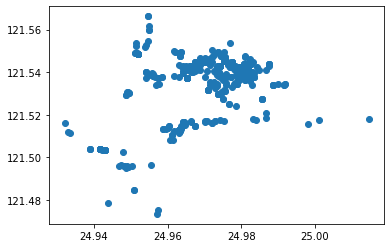

In [137]:
plt.scatter(house_df['X5 latitude'],house_df['X6 longitude'])
plt.show()

In [138]:
cl = house_df.iloc[:,5:7]

In [139]:
cl

,X5 latitude,X6 longitude
0,24.98298,121.54024
1,24.98034,121.53951
2,24.98746,121.54391
3,24.98746,121.54391
4,24.97937,121.54245
...,...,...
409,24.94155,121.50381
410,24.97433,121.54310
411,24.97923,121.53986
412,24.96674,121.54067


In [140]:
from sklearn.cluster import KMeans

In [141]:
kmeans = KMeans(2)
kmeans.fit(cl)

KMeans(n_clusters=2)

In [142]:
identified_cl = kmeans.fit_predict(cl)

In [143]:
identified_cl

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,

In [144]:
data_with_clu = house_df.copy()
data_with_clu['Clusters'] = identified_cl
data_with_clu

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,Clusters
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,0
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,0
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,0
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,0
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,0
...,...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4,1
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0,0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6,0
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5,0


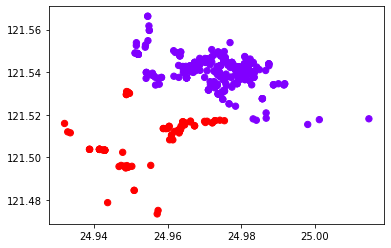

In [145]:
plt.scatter(data_with_clu['X5 latitude'],data_with_clu['X6 longitude'],c = data_with_clu['Clusters'],cmap = 'rainbow',s = 40)
plt.show()